In [9]:
# Snippet 1: Install (if needed) and import required libraries and modules
# -----------------------------------------------------------------------------
# This cell ensures all dependencies are installed, then loads them for:
#   • Data manipulation (pandas, NumPy)
#   • Visualization (Matplotlib, Seaborn)
#   • Modeling (scikit-learn, XGBoost, Prophet)
#   • Time-series forecasting (Prophet)
#   • Model persistence (joblib)
#   • Date/time utilities (datetime)
#
# Programmatic installation: attempts to import each package and installs via pip if missing.
import subprocess
import sys

packages = [
    "pandas", "numpy", "matplotlib", "seaborn",
    "scikit-learn", "xgboost", "prophet", "joblib"
]
for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# Standard imports
import warnings
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from prophet import Prophet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [10]:
datapath = ("/Users/anilkumar/Desktop/capestone/E-commerce_Dataset.csv")

df=pd.read_csv(datapath,parse_dates=[['Order_Date', 'Time']])

In [11]:
df.rename(columns={'Order_Date_Time': 'OrderTimestamp'}, inplace=True)
df.tail()

,OrderTimestamp,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
51285,2018-02-28 22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28 13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28 10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28 10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card
51289,2018-02-28 11:09:40,5.0,81129,Male,Web,Member,Home & Furniture,Bed Sheets,211.0,5.0,0.3,99.4,9.9,Medium,credit_card


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderTimestamp       51290 non-null  datetime64[ns]
 1   Aging                51289 non-null  float64       
 2   Customer_Id          51290 non-null  int64         
 3   Gender               51290 non-null  object        
 4   Device_Type          51290 non-null  object        
 5   Customer_Login_type  51290 non-null  object        
 6   Product_Category     51290 non-null  object        
 7   Product              51290 non-null  object        
 8   Sales                51289 non-null  float64       
 9   Quantity             51288 non-null  float64       
 10  Discount             51289 non-null  float64       
 11  Profit               51290 non-null  float64       
 12  Shipping_Cost        51289 non-null  float64       
 13  Order_Priority       51288 non-

In [13]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [14]:
df['Order_Day'] = df['OrderTimestamp'].dt.day_name()
df.head()

,OrderTimestamp,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Day
0,2018-01-02 10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,Tuesday
1,2018-07-24 20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,Tuesday
2,2018-11-08 08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,Thursday
3,2018-04-18 19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,Wednesday
4,2018-08-13 21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,Monday


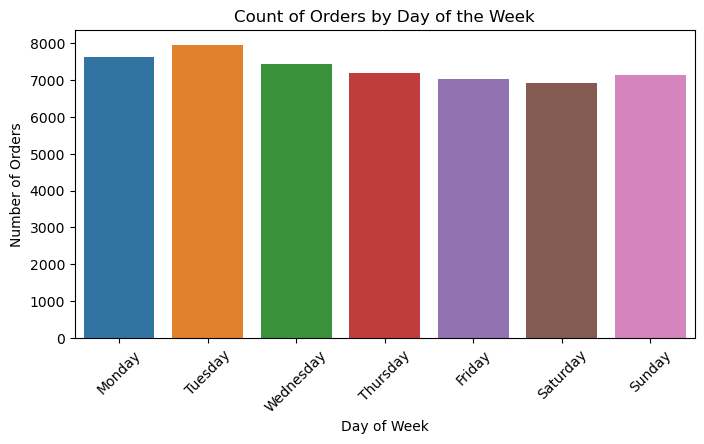

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Order_Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Count of Orders by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

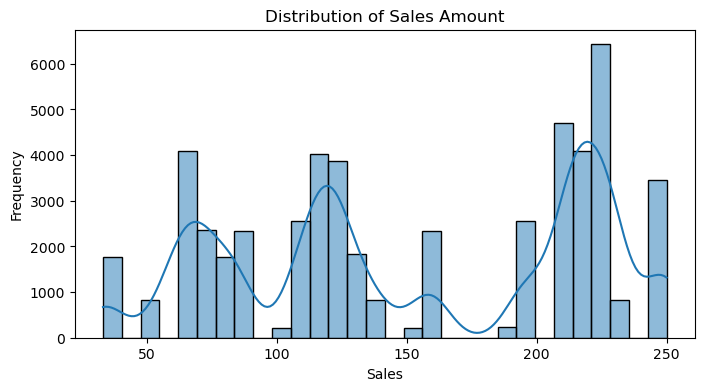

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], bins=30,kde=True)
#A KDE is a non-parametric way to estimate the probability density function (PDF) of a random variable based on a finite data sample. Instead of displaying only discrete bars (the histogram), it provides a smooth curve that represents the distribution’s shape. This can help you better visualize the underlying probability distribution of the data.


plt.title("Distribution of Sales Amount")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [17]:
df['Order_Hour'] = df['OrderTimestamp'].dt.hour

In [18]:
#  Map an integer hour (0-23) into a time-of-day label
# Categorizes hours into one of six periods: Late Night, Early Morning, Morning, Afternoon, Evening, Night

def get_time_of_day(hour):
    """
    Map the hour (0-23) into time-of-day categories.
    
    - Late Night: 0 <= hour < 4
    - Early Morning: 4 <= hour < 7
    - Morning: 7 <= hour < 12
    - Afternoon: 12 <= hour < 16
    - Evening: 16 <= hour < 20
    - Night: 20 <= hour < 24
    """
    if 0 <= hour < 4:
        return "Late Night"
    elif 4 <= hour < 7:
        return "Early Morning"
    elif 7 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    else:
        return "Night"


In [19]:
df['Time_of_Day'] = df['Order_Hour'].apply(get_time_of_day)
#.apply(get_time_of_day) calls the function get_time_of_day on each individual value (each hour) in the "Order_Hour" column
#The apply() method iterates over every element in the column and passes it to the get_time_of_day function.

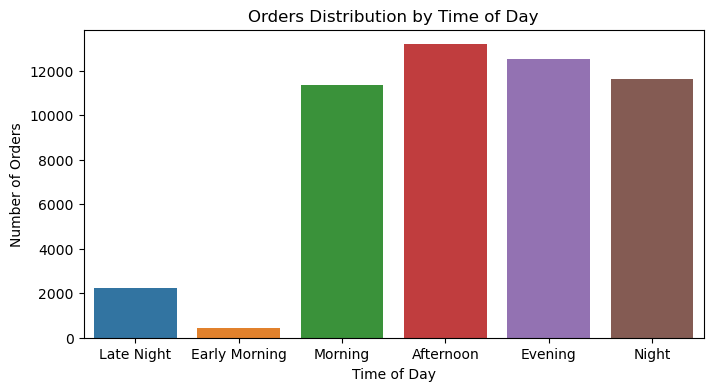

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Time_of_Day', data=df, order=["Late Night", "Early Morning", "Morning", "Afternoon", "Evening", "Night"])
plt.title("Orders Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Orders")
plt.show()

In [21]:
# Snippet: Aggregate and display the number of orders per product category for each time-of-day segment
product_time_pivot = df.pivot_table(
    index='Time_of_Day',
    columns='Product_Category',
    values='OrderTimestamp',  # using timestamp counts as proxy for order volume
    aggfunc='count',
    fill_value=0
)

print("Product Category Counts by Time of Day:")
print(product_time_pivot)


Product Category Counts by Time of Day:
Product_Category  Auto & Accessories  Electronic  Fashion  Home & Furniture
Time_of_Day                                                                
Afternoon                       1908         702     6577              3986
Early Morning                     72          22      198               148
Evening                         1833         637     6222              3805
Late Night                       348         113     1128               626
Morning                         1674         621     5703              3340
Night                           1670         606     5818              3533


In [22]:
dominant_categories = product_time_pivot.idxmax(axis=1)
print("\nMajority Product Category for Each Time of Day:")
print(dominant_categories)


Majority Product Category for Each Time of Day:
Time_of_Day
Afternoon        Fashion
Early Morning    Fashion
Evening          Fashion
Late Night       Fashion
Morning          Fashion
Night            Fashion
dtype: object


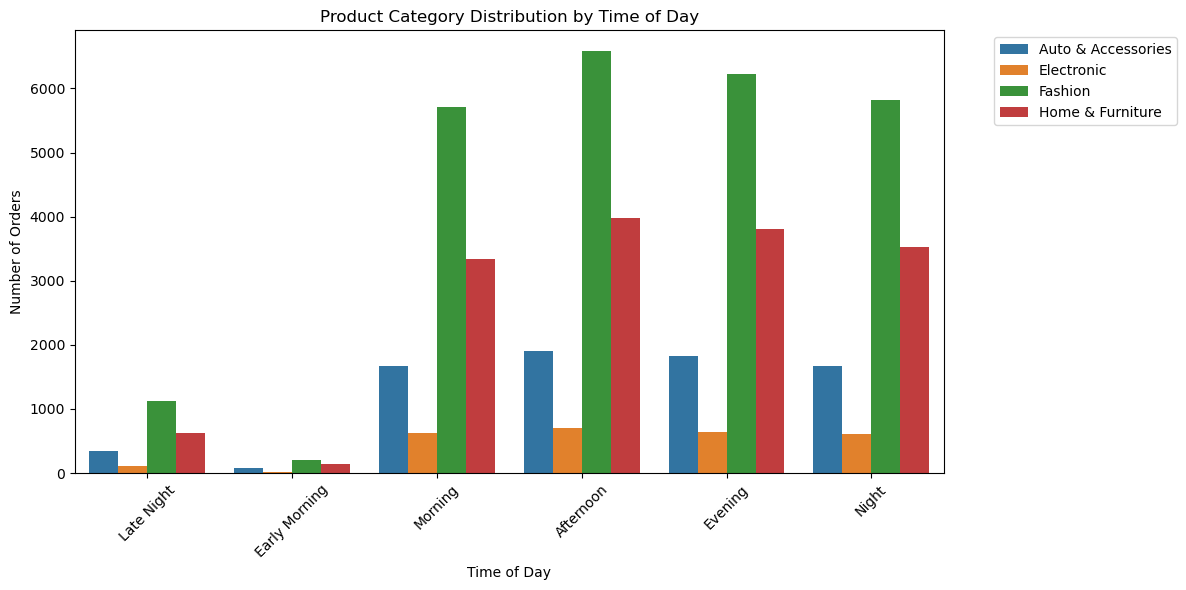

In [23]:
# Plotting order counts by product category for each time-of-day segment
import seaborn as sns
import matplotlib.pyplot as plt

# Count orders per time segment and product category
time_product_df = (
    df
    .groupby(['Time_of_Day', 'Product_Category'])
    .size()
    .reset_index(name='Order_Count')
)

# Define custom ordering for time-of-day segments
time_order = ["Late Night", "Early Morning", "Morning", "Afternoon", "Evening", "Night"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=time_product_df,
    x="Time_of_Day",
    y="Order_Count",
    hue="Product_Category",
    order=time_order
)
plt.title("Product Category Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [24]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [25]:
# Snippet: Extract order hour and create membership flag (1=Member, 0=Guest)
df['Order_Hour'] = df['OrderTimestamp'].dt.hour
df['is_member'] = (df['Customer_Login_type'].str.lower() == 'member').astype(int)


In [26]:
print(df.columns)
df.head()

Index(['OrderTimestamp', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method', 'Order_Day', 'Order_Hour', 'Time_of_Day',
       'is_member'],
      dtype='object')


,OrderTimestamp,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Day,Order_Hour,Time_of_Day,is_member
0,2018-01-02 10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,Tuesday,10,Morning,1
1,2018-07-24 20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,Tuesday,20,Night,1
2,2018-11-08 08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,Thursday,8,Morning,1
3,2018-04-18 19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,Wednesday,19,Evening,1
4,2018-08-13 21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,Monday,21,Night,1


In [27]:
df['is_member'] = (df['Customer_Login_type'].str.lower() == 'member').astype(int)


In [28]:
df = pd.get_dummies(df, columns=['Gender', 'Device_Type', 'Payment_method'])


In [29]:
df.columns

Index(['OrderTimestamp', 'Aging', 'Customer_Id', 'Customer_Login_type',
       'Product_Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Order_Day', 'Order_Hour',
       'Time_of_Day', 'is_member', 'Gender_Female', 'Gender_Male',
       'Device_Type_Mobile', 'Device_Type_Web', 'Payment_method_credit_card',
       'Payment_method_debit_card', 'Payment_method_e_wallet',
       'Payment_method_money_order', 'Payment_method_not_defined'],
      dtype='object')

In [30]:
import sys
!{sys.executable} -m pip install "dask[complete]" --quiet

In [34]:
import dask.dataframe as dd
import pandas as pd

# 1) Load the CSV via Dask
ddf = dd.read_csv(
    "/Users/anilkumar/Desktop/capestone/E-commerce_Dataset.csv",
    parse_dates=[['Order_Date', 'Time']],
    assume_missing=True
)

# Rename the combined datetime column
ddf = ddf.rename(columns={'Order_Date_Time': 'OrderTimestamp'})

# 2) Inspect column names to find the exact login/device columns
print("Columns available:", ddf.columns.tolist())

# 3) Identify the login-type and device-type columns dynamically
cols = [c.lower() for c in ddf.columns]
login_col  = ddf.columns[cols.index(next(c for c in cols if 'login' in c))]
device_col = ddf.columns[cols.index(next(c for c in cols if 'device' in c))]

print(f"Using login column: {login_col}")
print(f"Using device column: {device_col}")

# 4) Create flags
ddf['is_member']    = (ddf[login_col].str.lower() == 'member').astype(int)
ddf['mobile_flag']  = (ddf[device_col].str.lower() == 'mobile').astype(int)

# 5) Perform the groupby with all required aggregates
snapshot = pd.to_datetime('2018-12-31')

agg = ddf.groupby('Customer_Id').agg({
    'OrderTimestamp': ['min', 'max', 'count'],
    'Sales':          'sum',
    'Discount':       'mean',
    'is_member':      'max',    # did they ever log in as a member?
    'mobile_flag':    'mean'    # proportion of orders on mobile
}).compute()

# 6) Flatten and rename columns
agg.columns = [
    'first_purchase','last_purchase','frequency','monetary','avg_discount',
    'is_member','mobile_ratio'
]

# 7) Compute recency & tenure
agg['recency'] = (snapshot - agg['last_purchase']).dt.days
agg['tenure']  = (snapshot - agg['first_purchase']).dt.days

# 8) Reset index for a clean Pandas DataFrame
customer_df = agg.reset_index()

print("Dask-computed customer_df shape:", customer_df.shape)
display(customer_df.head())


Columns available: ['OrderTimestamp', 'Aging', 'Customer_Id', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Payment_method']
Using login column: Customer_Login_type
Using device column: Device_Type
Dask-computed customer_df shape: (38997, 10)


,Customer_Id,first_purchase,last_purchase,frequency,monetary,avg_discount,is_member,mobile_ratio,recency,tenure
0,37077.0,2018-01-02 10:56:33,2018-01-02 10:56:33,1,140.0,0.3,1,0.0,362,362
1,59173.0,2018-07-24 20:41:37,2018-07-24 20:41:37,1,211.0,0.3,1,0.0,159,159
2,41066.0,2018-11-08 08:38:49,2018-11-08 08:38:49,1,117.0,0.1,1,0.0,52,52
3,50741.0,2018-04-18 19:28:06,2018-04-18 19:28:06,1,118.0,0.3,1,0.0,256,256
4,53639.0,2018-08-13 21:18:39,2018-08-13 21:18:39,1,250.0,0.3,1,0.0,139,139


In [35]:
pip install "pyarrow>=10.0.1"


Note: you may need to restart the kernel to use updated packages.


In [36]:
# Compute customer-level metrics (recency, frequency, monetary, member status, mobile ratio) using Dask
import dask.dataframe as dd
import pandas as pd

# 1) Load the CSV via Dask
ddf = dd.read_csv(
    "/Users/anilkumar/Desktop/capestone/E-commerce_Dataset.csv",
    parse_dates=[['Order_Date','Time']],
    assume_missing=True
).rename(columns={'Order_Date_Time': 'OrderTimestamp'})

# 2) Inspect column names to find the exact login/device columns
print("Columns available:", ddf.columns.tolist())

# 3) Identify the login-type and device-type columns dynamically
cols = [c.lower() for c in ddf.columns]
login_col  = ddf.columns[cols.index(next(c for c in cols if 'login' in c))]
device_col = ddf.columns[cols.index(next(c for c in cols if 'device' in c))]

print(f"Using login column: {login_col}")
print(f"Using device column: {device_col}")

# 4) Create flags
ddf['is_member']    = (ddf[login_col].str.lower() == 'member').astype(int)
ddf['mobile_flag']  = (ddf[device_col].str.lower() == 'mobile').astype(int)

# 5) Perform the groupby with all required aggregates
snapshot = pd.to_datetime('2018-12-31')

agg = ddf.groupby('Customer_Id').agg({
    'OrderTimestamp': ['min','max','count'],
    'Sales':          'sum',
    'Discount':       'mean',
    'is_member':      'max',   # did they ever log in as a member?
    'mobile_flag':    'mean'   # proportion of orders on mobile
}).compute()

# 6) Flatten and rename columns
agg.columns = [
    'first_purchase','last_purchase','frequency','monetary','avg_discount',
    'is_member','mobile_ratio'
]

# 7) Compute recency & tenure
agg['recency'] = (snapshot - agg['last_purchase']).dt.days
agg['tenure']  = (snapshot - agg['first_purchase']).dt.days

# 8) Reset index for a clean Pandas DataFrame
customer_df = agg.reset_index()

print("Dask-computed customer_df shape:", customer_df.shape)
display(customer_df.head())


Columns available: ['OrderTimestamp', 'Aging', 'Customer_Id', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Payment_method']
Using login column: Customer_Login_type
Using device column: Device_Type
Dask-computed customer_df shape: (38997, 10)


,Customer_Id,first_purchase,last_purchase,frequency,monetary,avg_discount,is_member,mobile_ratio,recency,tenure
0,37077.0,2018-01-02 10:56:33,2018-01-02 10:56:33,1,140.0,0.3,1,0.0,362,362
1,59173.0,2018-07-24 20:41:37,2018-07-24 20:41:37,1,211.0,0.3,1,0.0,159,159
2,41066.0,2018-11-08 08:38:49,2018-11-08 08:38:49,1,117.0,0.1,1,0.0,52,52
3,50741.0,2018-04-18 19:28:06,2018-04-18 19:28:06,1,118.0,0.3,1,0.0,256,256
4,53639.0,2018-08-13 21:18:39,2018-08-13 21:18:39,1,250.0,0.3,1,0.0,139,139


In [37]:
# Snippet: Calculate RFM scores and a heuristic CLV for each customer
def compute_rfm(customer_df):
    """
    Assign Recency, Frequency, and Monetary scores based on quintile thresholds,
    then compute a composite RFM score and a weighted CLV heuristic.
    """
    # Determine quintile thresholds for recency, frequency, and monetary
    quantiles = customer_df[['recency', 'frequency', 'monetary']] \
        .quantile([0.2, 0.4, 0.6, 0.8]) \
        .to_dict()

    def r_score(recency):
        # Higher score for more recent purchases
        if recency <= quantiles['recency'][0.2]:
            return 5
        elif recency <= quantiles['recency'][0.4]:
            return 4
        elif recency <= quantiles['recency'][0.6]:
            return 3
        elif recency <= quantiles['recency'][0.8]:
            return 2
        return 1

    def fm_score(value, col):
        # Higher score for greater frequency or monetary value
        if value <= quantiles[col][0.2]:
            return 1
        elif value <= quantiles[col][0.4]:
            return 2
        elif value <= quantiles[col][0.6]:
            return 3
        elif value <= quantiles[col][0.8]:
            return 4
        return 5

    # Compute individual R, F, M scores
    customer_df['R'] = customer_df['recency'].apply(r_score)
    customer_df['F'] = customer_df['frequency'].apply(lambda x: fm_score(x, 'frequency'))
    customer_df['M'] = customer_df['monetary'].apply(lambda x: fm_score(x, 'monetary'))

    # Composite RFM score and weighted CLV heuristic
    customer_df['RFM_Score'] = (
        customer_df['R'].astype(str) +
        customer_df['F'].astype(str) +
        customer_df['M'].astype(str)
    )
    customer_df['CLV_heuristic'] = (
        0.5 * customer_df['R'] +
        customer_df['F'] +
        customer_df['M']
    )

    return customer_df

# Apply RFM and CLV computation
customer_df = compute_rfm(customer_df)

# Display the first few results
print("Customer RFM scores and heuristic CLV:")
print(customer_df[['Customer_Id', 'RFM_Score', 'CLV_heuristic']].head())


Customer RFM scores and heuristic CLV:
   Customer_Id RFM_Score  CLV_heuristic
0      37077.0       112            3.5
1      59173.0       313            5.5
2      41066.0       412            5.0
3      50741.0       112            3.5
4      53639.0       314            6.5


In [38]:
# Simulate a future_sales target by adding random noise to historical monetary values
np.random.seed(42)
customer_df['future_sales'] = customer_df['monetary'] * np.random.uniform(0.8, 1.2, size=len(customer_df))


In [39]:
# CELL 6.1: Prepare features and target for CLV modeling
from sklearn.model_selection import train_test_split
import numpy as np

# Define feature columns (include avg_discount if present)
features_clv = ['recency', 'frequency', 'monetary', 'tenure']
if 'avg_discount' in customer_df.columns:
    features_clv.append('avg_discount')

X_clv = customer_df[features_clv]
y_clv = customer_df['future_sales']


In [40]:
# CELL 6.2: Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_clv,
    y_clv,
    test_size=0.3,
    random_state=42
)


In [41]:
# CELL 6.3: Train XGBoost, evaluate performance, and save the model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Instantiate and fit the regressor
clv_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)
clv_model.fit(X_train, y_train)

# Predict on validation set and compute metrics
y_pred = clv_model.predict(X_val)
mse  = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_val, y_pred)

print("CLV Model Performance on Validation Set:")
print(f"  • MSE:  {mse:.2f}")
print(f"  • RMSE: {rmse:.2f}")
print(f"  • R²:   {r2:.2f}")

# Save the trained model for later use
joblib.dump(clv_model, 'clv_model.pkl')


CLV Model Performance on Validation Set:
  • MSE:  748.70
  • RMSE: 27.36
  • R²:   0.95


['clv_model.pkl']

In [42]:
# ================================
# CELL X: Churn Modeling (Logistic Regression) using Dask‐computed features
# ================================
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import make_pipeline
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, classification_report

# 1) Define cutoff and label windows
cutoff_date = pd.Timestamp('2018-09-01')
label_end   = cutoff_date + timedelta(days=30)

# 2) Split the Dask DataFrame into pre‐ and post‐periods
ddf_pre  = ddf[ddf['OrderTimestamp'] <  cutoff_date]
ddf_post = ddf[(ddf['OrderTimestamp'] >= cutoff_date) & (ddf['OrderTimestamp'] < label_end)]

# 3) Aggregate pre‐period features per customer
pre_agg = (
    ddf_pre
    .groupby('Customer_Id')
    .agg({
        'OrderTimestamp': ['min', 'max', 'count'],   # first/last purchase, frequency
        'Sales':          'sum',                     # monetary
        'Discount':       'mean',                    # avg_discount
        'is_member':      'max',                     # ever a member
        'mobile_flag':    'mean'                     # proportion of mobile orders
    })
    .compute()
)

# 4) Flatten MultiIndex and rename
pre_agg.columns = [
    'first_purchase', 'last_purchase', 'frequency',
    'monetary', 'avg_discount', 'is_member', 'mobile_ratio'
]
pre_agg = pre_agg.reset_index()

# 5) Compute recency & tenure relative to cutoff_date
pre_agg['recency'] = (cutoff_date - pre_agg['last_purchase']).dt.days
pre_agg['tenure']  = (cutoff_date - pre_agg['first_purchase']).dt.days

# 6) Label churn: customers with zero orders in the 30‐day label window
post_counts = (
    ddf_post
    .groupby('Customer_Id')
    .size()
    .rename('orders_next_30d')
    .compute()
    .reset_index()
)
features = (
    pre_agg
    .merge(post_counts, on='Customer_Id', how='left')
    .fillna({'orders_next_30d': 0})
)
features['churn'] = (features['orders_next_30d'] == 0).astype(int)

# 7) Prepare feature matrix X and target y
churn_features = [
    'recency', 'frequency', 'monetary',
    'avg_discount', 'is_member', 'mobile_ratio', 'tenure'
]
X = features[churn_features]
y = features['churn']

# 8) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 9) Build pipeline with imputation, scaling, and logistic regression
lr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),           # fill any NaNs with column medians
    StandardScaler(),
    LogisticRegression(
        class_weight='balanced',
        solver='liblinear',
        random_state=42
    )
)
lr_pipe.fit(X_train, y_train)

# 10) Predict and evaluate
preds = lr_pipe.predict(X_test)
print("Churn Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, preds), 3))
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=['Stay','Churn']))


Churn Model Performance:
Accuracy: 0.488

Classification Report:
              precision    recall  f1-score   support

        Stay       0.05      0.48      0.09       409
       Churn       0.94      0.49      0.64      7419

    accuracy                           0.49      7828
   macro avg       0.50      0.48      0.37      7828
weighted avg       0.90      0.49      0.61      7828



In [45]:
# ===============================
# CELL X+1: Try Random Forest & HistGradientBoostingClassifier
# ===============================
from sklearn.pipeline            import make_pipeline
from sklearn.impute              import SimpleImputer
from sklearn.ensemble            import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics             import accuracy_score, classification_report

# 1) Random Forest
rf_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    )
)
rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)

print("=== Random Forest Classifier ===")
print("Accuracy:", round(accuracy_score(y_test, rf_preds), 3))
print(classification_report(y_test, rf_preds, target_names=['Stay','Churn']))

# 2) Histogram-based Gradient Boosting (fixed)
hgb_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    HistGradientBoostingClassifier(
        max_iter=200,
        learning_rate=0.1,
        random_state=42
    )
)
hgb_pipe.fit(X_train, y_train)
hgb_preds = hgb_pipe.predict(X_test)

print("\n=== HistGradientBoostingClassifier ===")
print("Accuracy:", round(accuracy_score(y_test, hgb_preds), 3))
print(classification_report(y_test, hgb_preds, target_names=['Stay','Churn']))


=== Random Forest Classifier ===
Accuracy: 0.923
              precision    recall  f1-score   support

        Stay       0.07      0.04      0.05       409
       Churn       0.95      0.97      0.96      7419

    accuracy                           0.92      7828
   macro avg       0.51      0.50      0.50      7828
weighted avg       0.90      0.92      0.91      7828


=== HistGradientBoostingClassifier ===
Accuracy: 0.948
              precision    recall  f1-score   support

        Stay       0.00      0.00      0.00       409
       Churn       0.95      1.00      0.97      7419

    accuracy                           0.95      7828
   macro avg       0.47      0.50      0.49      7828
weighted avg       0.90      0.95      0.92      7828



In [46]:
# ===============================
# CELL X+5: Install & Run LightGBM Classifier for Churn
# ===============================
import sys
import subprocess

# 1) Install LightGBM if it's not already present
subprocess.check_call([sys.executable, "-m", "pip", "install", "lightgbm"])

# 2) Now import and run the model
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Build pipeline: impute missing → LightGBM
lgb_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    lgb.LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        class_weight='balanced',
        random_state=42
    )
)

# Fit on the training data
lgb_pipe.fit(X_train, y_train)

# Predict on the test set
lgb_preds = lgb_pipe.predict(X_test)

# Evaluate
print("=== LightGBM Classifier ===")
print("Accuracy:", round(accuracy_score(y_test, lgb_preds), 3))
print(classification_report(y_test, lgb_preds, target_names=['Stay','Churn']))


[LightGBM] [Info] Number of positive: 17311, number of negative: 954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18265, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
=== LightGBM Classifier ===
Accuracy: 0.729
              precision    recall  f1-score   support

        Stay       0.06      0.29      0.10       409
       Churn       0.95      0.75      0.84      7419

    accuracy                           0.73      7828
   macro avg       0.51      0.52      0.47      7828
weighted avg       0.90      0.73      0.80      7828



In [48]:
joblib.dump(lgb_pipe, 'churn_lgb_pipe.pkl')


['churn_lgb_pipe.pkl']

In [49]:
joblib.dump(clv_model, 'clv_model.pkl')

['clv_model.pkl']

In [50]:
import joblib
joblib.dump(clv_model,    "clv_model.pkl")
joblib.dump(lgb_pipe,   "churn_lgb_pipe.pkl")

['churn_lgb_pipe.pkl']

In [55]:
# ✅ Prepare final data frame for Streamlit
X_clv_final = customer_df[[
    'recency', 'frequency', 'monetary', 'tenure', 'avg_discount'
]]

X_churn = customer_df[[
    'recency', 'frequency', 'monetary', 'avg_discount', 'is_member', 'mobile_ratio', 'tenure'
]]

# Make predictions
customer_df['Churn_Prob'] = lgb_pipe.predict_proba(X_churn)[:, 1]
customer_df['Predicted_CLV'] = clv_model.predict(X_clv_final)
customer_df['ExpectedLoss'] = customer_df['Churn_Prob'] * customer_df['Predicted_CLV']

# Action based on threshold
threshold_loss = customer_df['ExpectedLoss'].median()
customer_df['Action'] = np.where(customer_df['ExpectedLoss'] >= threshold_loss, 'Retain', 'Ignore')

# Final output
final_output = customer_df[[
    'Customer_Id', 'Churn_Prob', 'Predicted_CLV', 'ExpectedLoss', 'Action'
]]

final_output.to_csv("final_output.csv", index=False)
print("✅ final_output.csv written to disk")


✅ final_output.csv written to disk
